In [1]:
import fastai
from fastai.vision import *
from fastai.widgets import *
from fastai.callbacks import *
from fastai.vision.gan import *

from fastai.metrics import accuracy_thresh, top_k_accuracy, error_rate, FBeta, root_mean_squared_error, mean_squared_error, mean_absolute_error

from torchvision.models import vgg16_bn

In [2]:
path = Path('./data/0418_Combined')

In [3]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=0.77, max_zoom=1.07,
                   max_lighting=0.2, max_warp=0.2, p_affine=0.2,
                   p_lighting=0.2, xtra_tfms=None)

In [4]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, bs=64, size=296, test='test')
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2345 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: CategoryList
000024463,000024463,000024463,000024463,000024463
Path: data\0418_Combined;

Valid: LabelList (425 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: CategoryList
000024463,000024463,000024463,000024463,000024464
Path: data\0418_Combined;

Test: LabelList (379 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: EmptyLabelList
,,,,
Path: data\0418_Combined

In [5]:
learn = cnn_learner(data, models.resnet50, pretrained=True, metrics=[accuracy], callback_fns=ShowGraph)

In [6]:
#Load file
learn.load('resnet50_json92_40epoch_0896471')

Learner(data=ImageDataBunch;

Train: LabelList (2345 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: CategoryList
000024463,000024463,000024463,000024463,000024463
Path: data\0418_Combined;

Valid: LabelList (425 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: CategoryList
000024463,000024463,000024463,000024463,000024464
Path: data\0418_Combined;

Test: LabelList (379 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: EmptyLabelList
,,,,
Path: data\0418_Combined, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mo

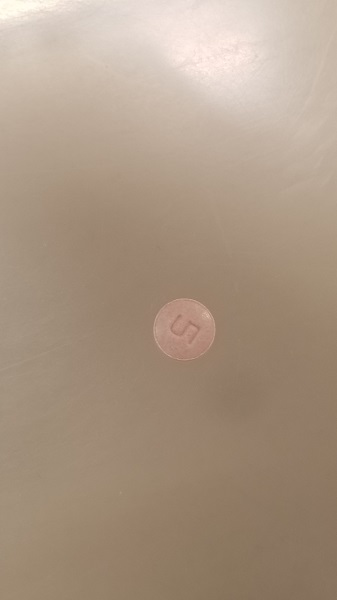

In [12]:
#test image
img_path = './data/0418_Combined/test_one.jpg'
img = open_image(img_path)
img

In [18]:
#get prediction
#In this case we have only trained the model to identify corresponding numbers, in this case 681800513
prediction, indicies, losses = learn.predict(img)
prediction

Category 681800513

In [14]:
#However this can be expanded by using a corresponding json file that has all the info about what 681800513 is by loading
#json file
prediction, indice, losses = learn.predict(img)
with open('json_92_version2.json', 'r') as f:
    cat_to_name = json.load(f)

In [15]:
# Prediction #1
pred_info = cat_to_name[str(prediction)]
pred_name = pred_info['name']
pred_shape = pred_info['shape']
pred_color = pred_info['color']
pred_mark = pred_info['marking']

In [16]:
#Now get the prediction as well as corresponding values
prediction, pred_name, pred_shape, pred_color, pred_mark

(Category 681800513, 'Lisinopril 5mg', 'round', 'pink', '5')